# Task 3 : Prediction Using Unsupervised ML
* Task is to use the given ***iris*** dataset and predict the **optimum number of clusters** and represent it visually.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

## 2. Exploring and Analysing the data

In [3]:
# loading dataset
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# shape of dataset(rows and columns)
data.shape

(150, 6)

In [5]:
# to get to know the names of columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# descriptive statistics of dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# more info on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# to get to know unique species of iris flower dataset
data.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 3. K-means Algo for Clusters

In [10]:
X = data.iloc[:,[1,2,3,4]].values

In [11]:
# importing kmeans
from sklearn.cluster import KMeans

In [13]:
# defining elbow method for estimating number of clusters
def elbowmethod(num_of_clusters,inertias):
    pyplot.plot(num_of_clusters,inertias)
    pyplot.title('Elbow Method')
    pyplot.xlabel('Number of Clusters')
    pyplot.ylabel('Inertias')
    pyplot.show()

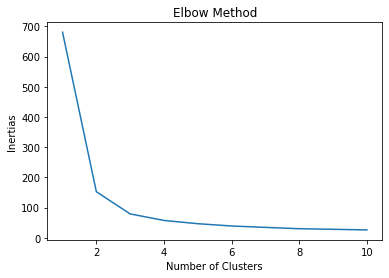

In [15]:
# list
inertias = []
clusters = range(1,11)

for i in clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
elbowmethod(clusters,inertias)

### Observation
* The optimum number of clusters is where the elbow occurs.
* From the above plot, we can observe that the **optimum number of clusters can be choosen is *3***.

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
y_kmeans = kmeans.fit_predict(X)

kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## 4. Visualizing the Clusters

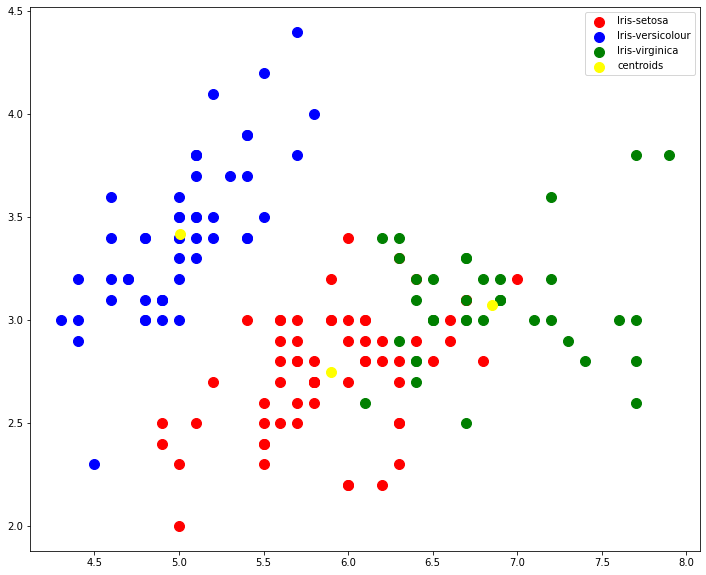

In [17]:
pyplot.figure(figsize=(12,10))

# visualizing the clusters 
pyplot.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 100,c='red',label='Iris-setosa')
pyplot.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 100,c='blue',label='Iris-versicolour')
pyplot.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 100,c='green',label = 'Iris-virginica')

# plotting the centroids of the clusters
pyplot.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
pyplot.legend()
pyplot.show()

## 5. Conclusion
* The optimum number of clusters required to classify iris flower species are **3**.